# Analyse du Test Diagnostique — Comprendre les Besoins des Élèves dès le Début

Ce notebook présente une analyse détaillée des résultats du test diagnostique.  
Il a pour objectifs :  
1. D’identifier les lacunes des élèves dans les domaines clés du programme de mathématiques  
2. De définir des stratégies pédagogiques ciblées pour y remédier

Le test diagnostique a été conçu pour évaluer les compétences fondamentales en mathématiques dès le début de l’année scolaire.  
Il permet aux enseignants de prendre des décisions pédagogiques éclairées basées sur des données concrètes plutôt que sur des impressions générales.

Ce document peut également servir de guide pour les enseignants souhaitant adopter une approche pédagogique fondée sur les données.


## 📦 Importation des Librairies Nécessaires

Nous commençons par importer les bibliothèques Python nécessaires à la manipulation et à la visualisation des données.

In [2]:
# Traitement des données
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Chargement des Résultats des Élèves

Nous allons maintenant charger les résultats du test diagnostique à partir d’un fichier Excel situé dans le dossier `data/`.

In [5]:
# Charger chaque fichier Excel correspondant à une classe
df_a = pd.read_excel("../data/Classe1.xlsx")
df_b = pd.read_excel("../data/Classe2.xlsx")
df_c = pd.read_excel("../data/Classe3.xlsx")

# Ajouter une colonne pour indiquer la classe
df_a["Class"] = "Classe 1"
df_b["Class"] = "Classe 2"
df_c["Class"] = "Classe 3"

# Concaténer les données pour avoir une vue d’ensemble
df_total = pd.concat([df_a, df_b, df_c], ignore_index=True)


## 📑 Structure du Test & Explication des Données

Le test diagnostique a été conçu pour évaluer les compétences fondamentales des élèves en **algèbre**, **géométrie**, et **résolution de problèmes**. Il se composait de six exercices, répartis comme suit :

- **Exercice 1** : Classification des Nombres
  - Les élèves devaient classer des nombres en trois catégories : entiers, décimaux ou fractions.
  
- **Exercice 2** : Opérations Arithmétiques sur Différents Types de Nombres
  - Cet exercice testait la capacité à effectuer les quatre opérations de base (addition, soustraction, multiplication et division) sur des entiers, décimaux et des fractions.
  
- **Exercice 3** : Ordonnancement des Nombres
  - Les élèves devaient classer une série de nombres (entiers, décimaux et fractions) dans un ordre croissant ou décroissant.
  
- **Exercice 4** : Différenciation entre un Segment de Droite et une Demi-Droite
  - Cet exercice de géométrie visait à tester la compréhension des élèves des figures géométriques en leur demandant de distinguer entre un segment de droite et une demi-droite.
  
- **Exercice 5** : Calcul des Mesures de Formes Régulières
  - Les élèves devaient calculer les mesures de base (comme le périmètre et la surface) de formes géométriques régulières telles que des carrés et des triangles.
  
- **Exercice 6** : Problème de Proportionnalité et Pourcentage
  - Le dernier exercice consistait en une application pratique de la proportionnalité et des pourcentages, testant la capacité des élèves à résoudre des problèmes concrets en utilisant ces concepts.

### 🔹 Explication des Colonnes du Dataset :
Le dataset contient les colonnes suivantes :
- **ID Élève** : L'identifiant unique pour chaque élève (nom remplacé pour la protection des données).
- **Exercice 1 - Algèbre** : Le score pour le premier exercice lié à l'algèbre.
- **Exercice 2 - Algèbre** : Le score pour le deuxième exercice lié à l'algèbre.
- **Exercice 3 - Algèbre** : Le score pour le troisième exercice lié à l'algèbre.
- **Exercice 4 - Géométrie** : Le score pour le quatrième exercice lié à la géométrie.
- **Exercice 5 - Géométrie** : Le score pour le cinquième exercice lié à la géométrie.
- **Exercice 6 - Résolution de Problèmes** : Le score pour le dernier exercice de résolution de problèmes.
- **Total Algèbre** : Le total des points pour tous les exercices d'algèbre.
- **Total Géométrie** : Le total des points pour tous les exercices de géométrie.
- **Total Résolution de Problèmes** : Le total des points pour les exercices de résolution de problèmes.
- **Sexe** : Le sexe de l'élève, où "M" représente masculin et "F" représente féminin.

### 🔹 Aperçu des Données
Voici un aperçu de la structure du dataset :


In [6]:
# Aperçu des données : Afficher les premières lignes du dataset
df_total.head()

,ID Élève,sexe,Exercice 1,Exercice 2,Exercice 3,Total Algèbre,Exercice 4,Exercice 5,Total Géométrie,Exercice 6,Total Résolution de Problèmes,Class
0,1,F,3.0,2.0,1.0,6.0,0.0,2.0,2.0,0.0,0.0,Classe 1
1,2,M,1.5,1.0,1.5,4.0,0.0,0.0,0.0,0.0,0.0,Classe 1
2,3,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Classe 1
3,4,F,3.5,6.0,1.5,11.0,0.0,1.0,1.0,1.0,1.0,Classe 1
4,5,F,3.5,3.0,1.5,8.0,0.0,2.0,2.0,0.0,0.0,Classe 1


## 👥 Analyse de la Démographie des Classes

Dans cette section, nous analysons la structure de la population étudiante à travers les trois classes ayant passé le test diagnostique. L'objectif est de comprendre la répartition des étudiants par classe et par sexe (filles et garçons).

Nous calculons :
- Le nombre total d'étudiants dans chaque classe.
- Le nombre d'étudiants masculins et féminins dans chaque classe.
- Les totaux globaux pour toutes les classes.

Ces informations aident à identifier d'éventuels déséquilibres entre les sexes et assurent une analyse équitable et inclusive.

In [25]:
# Créer une liste pour le résumé
summary = []

# Boucler à travers chaque classe et collecter les données
for name, df in {
    'Classe 1': df_a,
    'Classe 2': df_b,
    'Classe 3': df_c
}.items():
    total = len(df)  # Nombre total d'élèves dans la classe
    males = (df['sexe'] == 'M').sum()  # Nombre d'élèves masculins
    females = (df['sexe'] == 'F').sum()  # Nombre d'élèves féminins
    summary.append([name, males, females, total])  # Ajouter les résultats à la liste

# Ajouter la ligne des totaux
total_all = sum(row[3] for row in summary)  # Total des élèves
total_males = sum(row[1] for row in summary)  # Total des garçons
total_females = sum(row[2] for row in summary)  # Total des filles
summary.append(['Total', total_males, total_females, total_all])  # Ajouter la ligne des totaux

# Créer le DataFrame
df_summary = pd.DataFrame(summary, columns=['Classe', 'Garçons', 'Filles', 'Total'])

# Afficher le tableau
print("\nNombre des élèves dans chaque classe :")
df_summary.style.hide(axis="index")



Nombre des élèves dans chaque classe :


Classe,Garçons,Filles,Total
Classe 1,17,14,31
Classe 2,20,11,31
Classe 3,18,13,31
Total,55,38,93


### Distribution des Genres par Classe (Graphique en Donut)

Pour mieux comprendre la composition par genre dans chaque classe, nous visualisons le nombre d'élèves masculins et féminins à l'aide d'un graphique en donut. Ce type de visualisation permet de mettre en évidence la proportion de chaque genre de manière claire et est utile pour identifier d'éventuels déséquilibres qui pourraient influencer la dynamique de groupe ou les approches pédagogiques.


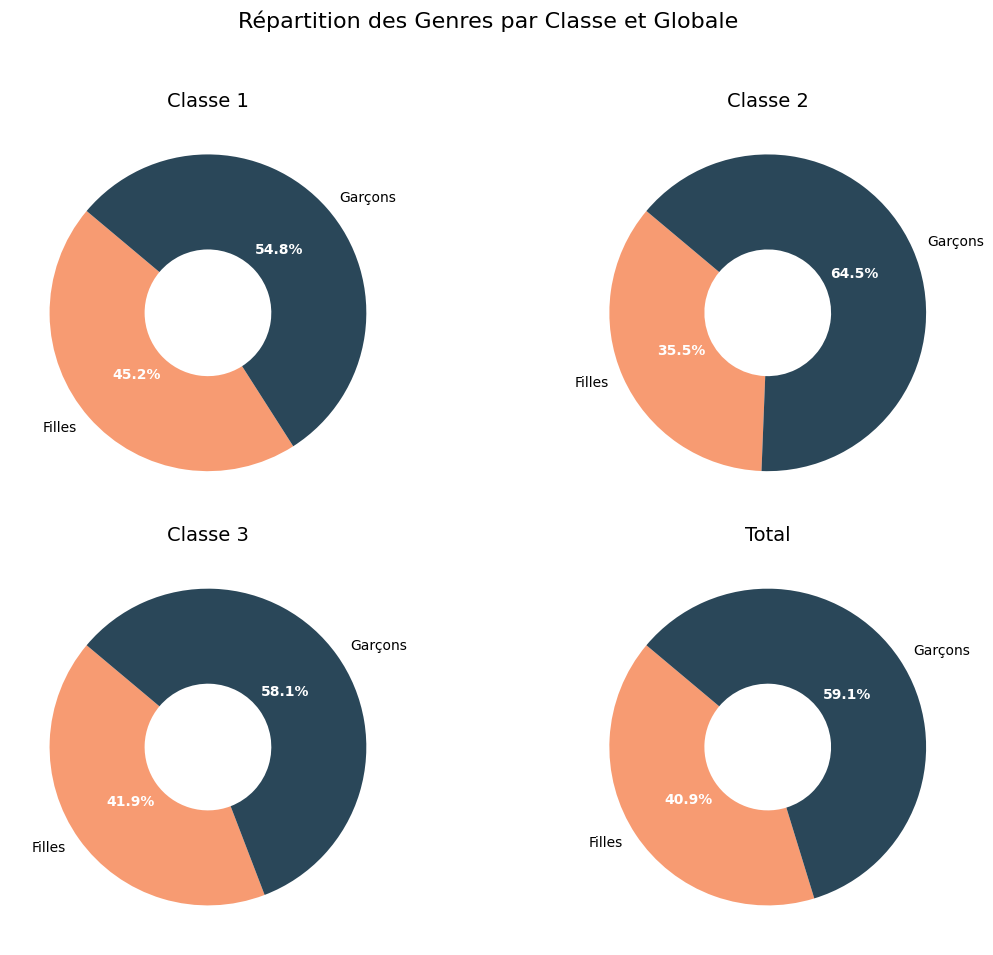

In [8]:
# Liste des DataFrames pour chaque classe
class_data = [df_a, df_b, df_c, df_total]
class_names = ['Classe 1', 'Classe 2', 'Classe 3', 'Total']

# Définir le style du graphique
colors = ['#F79B72', '#2A4759']
labels = ['Filles', 'Garçons']

# Créer une figure avec 2x2 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Aplatir pour faciliter l'itération

# Générer des graphiques en donut
for i, (df, title) in enumerate(zip(class_data, class_names)):
    counts = df['sexe'].value_counts()
    values = [counts.get('F', 0), counts.get('M', 0)]

    wedges, texts, autotexts = axes[i].pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops={'width': 0.6}
    )
        
    axes[i].set_title(f'{title}', fontsize=14)
    plt.setp(autotexts, size=10, weight='bold', color='white')

# Cacher le sous-graphique inutilisé si nécessaire (au cas où il y en aurait moins de 4)
if len(class_data) < 4:
    for j in range(len(class_data), 4):
        fig.delaxes(axes[j])

# Ajouter un titre général et ajustements de mise en page
plt.suptitle('Répartition des Genres par Classe et Globale', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Analyse de la Présence des Élèves

Ensuite, nous examinons **la présence des élèves lors du test diagnostique** en identifiant les données manquantes (valeurs NaN) dans les feuilles de résultats. Ces valeurs manquantes correspondent généralement aux élèves qui étaient **absents** lors du test. Nous résumons ces données par classe et globalement, puis les visualisons à l'aide d'un graphique à barres groupées montrant :

- Le **nombre total d'élèves** inscrits par classe.
- Le **nombre d'élèves présents** (c'est-à-dire ceux qui ont soumis des données complètes du test).


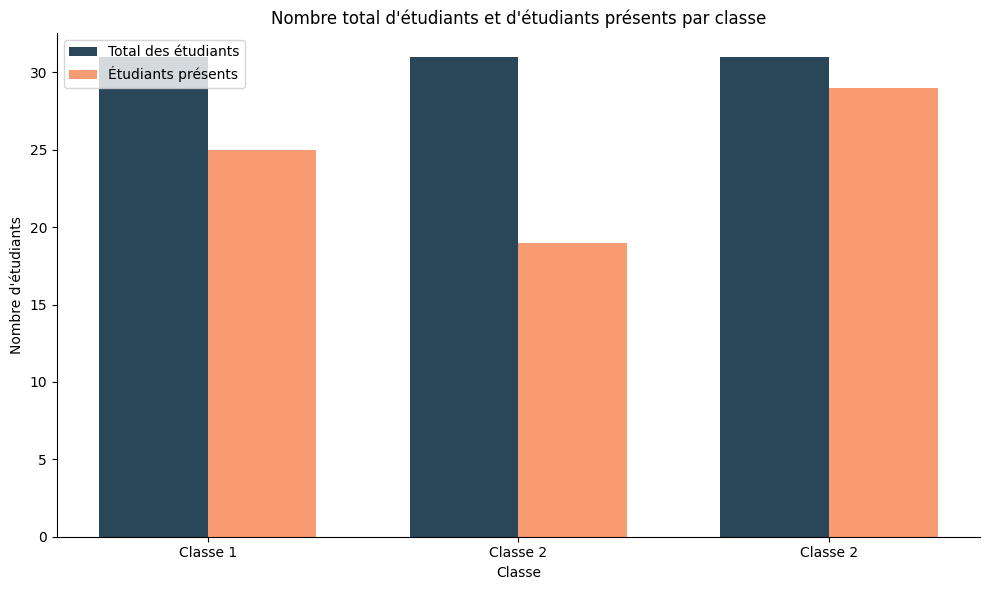

In [10]:
# Compter le nombre total d'étudiants et le nombre d'étudiants présents par classe
def count_attendance(df):
    total = len(df)
    present = df.dropna().shape[0]  # lignes sans NaN
    return total, present

totals_Classe_1 = count_attendance(df_a)
totals_Classe_2 = count_attendance(df_b)
totals_Classe_3 = count_attendance(df_c)

# Étiquettes pour les classes
labels = ['Classe 1', 'Classe 2', 'Classe 2']
total_entries = [totals_Classe_1[0], totals_Classe_2[0], totals_Classe_3[0]]
non_nan_counts = [totals_Classe_1[1], totals_Classe_2[1], totals_Classe_3[1]]

# Paramétrer le graphique en barres
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
ax.bar(x, total_entries, width, label='Total des étudiants', color='#2A4759')
ax.bar([p + width for p in x], non_nan_counts, width, label='Étudiants présents', color='#F79B72')

# Personnalisation

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Classe')
ax.set_ylabel('Nombre d\'étudiants')
ax.set_title('Nombre total d\'étudiants et d\'étudiants présents par classe')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


### **Feedback sur la Structure des Classes**

Après avoir analysé la **répartition des sexes** dans les trois classes, nous constatons une tendance constante : **le nombre de garçons dépasse celui des filles** dans les trois classes. Cela pourrait indiquer un déséquilibre entre les sexes dans la composition des classes, ce qui pourrait être une information utile lors de la planification de stratégies pédagogiques différenciées ou d'activités en groupe.

De plus, en ce qui concerne **la présence des élèves**, les données montrent que le nombre d'**élèves absents** est assez faible dans chaque classe. C'est un signe positif, indiquant que la plupart des élèves étaient présents pour le test diagnostique. Le faible nombre d'absents suggère un niveau élevé d'engagement et d'implication des élèves, ce qui est essentiel pour une évaluation précise de leurs compétences et capacités au début de l'année. Par conséquent, cet ensemble de données semble refléter parfaitement nos classes, nous offrant une base fiable pour des analyses et actions futures.

Cette analyse fournit un aperçu précieux de la composition et de l'engagement des élèves, nous aidant à prendre des décisions éclairées concernant les interventions ciblées et les méthodes d'enseignement.

---


## 📊 Analyse Générale des Résultats des Élèves

Dans cette section, nous analysons la performance globale des élèves des trois classes ayant passé le test diagnostique. Nos objectifs sont les suivants :

- Calculer la **note moyenne** pour chaque classe.
- Calculer le **score total** pour chaque classe ainsi que pour l'ensemble des classes.
- Comparer la **performance entre les classes**.
- Visualiser la **distribution des scores** afin d'observer la répartition des résultats et d’identifier des tendances ou des écarts.


In [26]:
# Calcul des totaux pour chaque DataFrame (algèbre + géométrie + résolution de problèmes)
df_a['Total'] = df_a['Total Algèbre'] + df_a['Total Géométrie'] + df_a['Total Résolution de Problèmes']
df_b['Total'] = df_b['Total Algèbre'] + df_b['Total Géométrie'] + df_b['Total Résolution de Problèmes']
df_c['Total'] = df_c['Total Algèbre'] + df_c['Total Géométrie'] + df_c['Total Résolution de Problèmes']

# 1. Calcul des scores moyens et totaux
def calculer_scores(df, classe):
    score_total = df['Total'].sum(skipna=True)
    score_moyen = df['Total'].mean(skipna=True)
    return {'classe': classe, 'total': score_total, 'moyenne': score_moyen}

resultats = [
    calculer_scores(df_a, 'Classe 1'),
    calculer_scores(df_b, 'Classe 2'),
    calculer_scores(df_c, 'Classe 3')
]

# Combinaison des résultats dans un DataFrame
df_scores = pd.DataFrame(resultats)

# Calcul des scores globaux (toutes classes confondues)
tous_les_scores = pd.concat([df_a['Total'], df_b['Total'], df_c['Total']], ignore_index=True)
total_global = tous_les_scores.sum(skipna=True)
moyenne_globale = tous_les_scores.mean(skipna=True)

# Ajout des scores globaux au DataFrame des résultats
df_scores.loc[len(df_scores.index)] = ['Total', total_global, moyenne_globale]

# Afficher les moyennes des scores
print("\nMoyennes des résultats :")
df_scores


Moyennes des résultats :


,classe,total,moyenne
0,Classe 1,213.5,8.540000
1,Classe 2,140.5,7.394737
2,Classe 3,293.0,10.103448
3,Total,647.0,8.863014


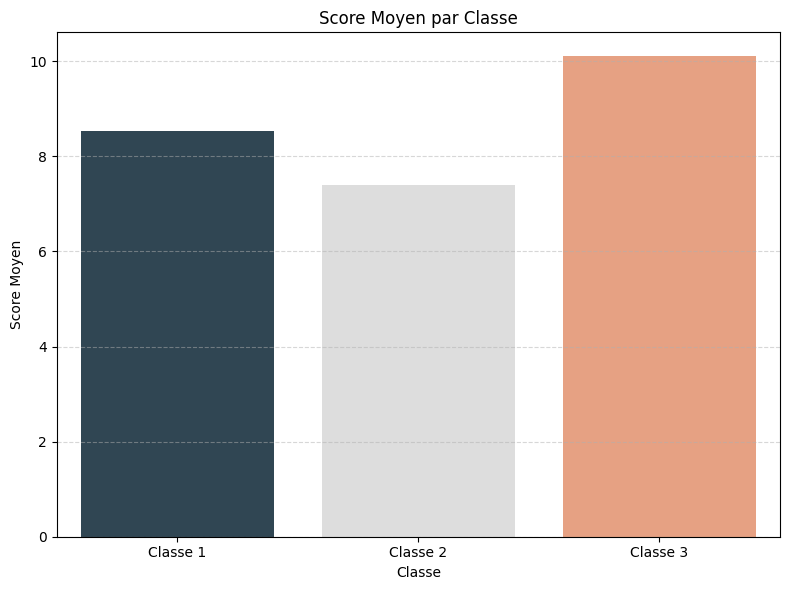

In [13]:
# 2. Diagramme en barres des scores moyens
couleurs = ['#2A4759', '#DDDDDD', '#F79B72']
plt.figure(figsize=(8, 6), facecolor='none')
sns.barplot(data=df_scores[:-1], x='classe', y='moyenne', hue='classe', palette=couleurs, legend=False)
plt.title('Score Moyen par Classe')
plt.xlabel('Classe')
plt.ylabel('Score Moyen')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


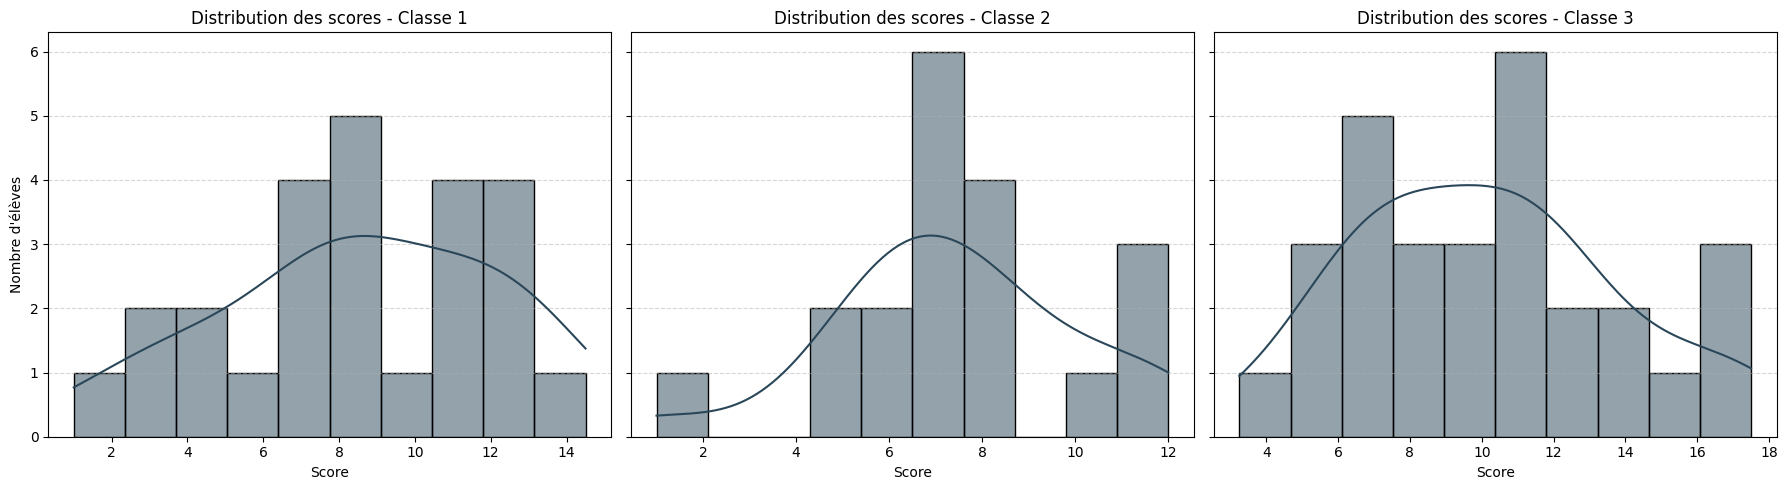

In [14]:
# 3. Distribution des scores par classe
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True, facecolor='none')
classes = [('Classe 1', df_a), ('Classe 2', df_b), ('Classe 3', df_c)]

for ax, (etiquette, df) in zip(axes, classes):
    sns.histplot(df['Total'], bins=10, kde=True, ax=ax, color='#2A4759')
    ax.set_title(f'Distribution des scores - {etiquette}')
    ax.set_xlabel('Score')
    ax.set_ylabel('Nombre d\'élèves')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### 📈 Distribution des Scores et Comparaison entre les Classes

À partir de l’analyse de la distribution des scores dans les trois classes, nous pouvons tirer les observations suivantes :

- **La Classe 3** présente la **meilleure moyenne générale** parmi les trois classes. Les élèves de cette classe affichent une **large gamme de performances**, allant de très faibles à très élevées. Cependant, **la majorité des élèves se situent autour de la moyenne**, ce qui indique un niveau globalement équilibré avec quelques cas particuliers aux deux extrêmes.

- **La classe 1** arrive en **deuxième position en termes de moyenne**. La distribution des résultats dans cette classe montre clairement **trois groupes distincts** : les élèves en difficulté, les élèves moyens et les bons élèves. Cette diversité peut être exploitée pour mettre en place une pédagogie différenciée.

- **La classe 2** affiche la **moyenne la plus faible**. Toutefois, les résultats sont plus **homogènes et concentrés autour d’un intervalle spécifique**. Mis à part un petit nombre d’élèves **très bons** ou **très faibles**, **la majorité des élèves appartient à un groupe de performance unique**, ce qui suggère un niveau globalement homogène.

Cette comparaison nous permet de mieux comprendre les forces et les difficultés de chaque classe et peut orienter des stratégies pédagogiques ciblées.

---


### 📊 Analyse des Résultats en Algèbre

Dans cette section, nous allons analyser les performances des élèves en **algèbre** en utilisant deux approches principales :

1. **Comparaison des Moyennes entre les Classes**  
   Nous comparerons les scores moyens de chaque classe pour chaque exercice d'algèbre afin de mettre en évidence les différences de performance entre les groupes.

2. **Analyse de Compétence par Notion d'Algèbre**  
   Pour chaque exercice, nous calculerons le pourcentage d'élèves ayant atteint le niveau de maîtrise requis. Cela nous permettra d'identifier les notions d'algèbre bien comprises et celles qui nécessitent un renforcement.

L’objectif de cette analyse est de mieux comprendre les forces et les faiblesses des élèves en algèbre afin de proposer un accompagnement pédagogique ciblé.


In [ ]:
# Définir les colonnes des exercices d'algèbre
colonnes_algebre = ['Exercice 1', 'Exercice 2', 'Exercice 3 ']  # à ajuster si plus d'exercices

# Fonction pour obtenir la moyenne par classe des exercices d'algèbre
def resume_algebre_par_classe(df, nom_classe):
    moyennes = df[colonnes_algebre].mean()
    return pd.DataFrame({'Exercice': moyennes.index, nom_classe: moyennes.values})

# 1. Calculer les moyennes pour chaque classe
resume_a = resume_algebre_par_classe(df_a, 'Classe 1')
resume_b = resume_algebre_par_classe(df_b, 'Classe 2')
resume_c = resume_algebre_par_classe(df_c, 'Classe 3')

# Fusionner les résumés
resume_algebre = resume_a.merge(resume_b, on='Exercice').merge(resume_c, on='Exercice')

# Ajouter la moyenne générale
resume_algebre['Moyenne Générale'] = resume_algebre[['Classe 1', 'Classe 2', 'Classe 3']].mean(axis=1)

# Afficher le résumé sous forme de DataFrame
print("\nRésumé des résultats en algèbre :")
resume_algebre



Résumé des résultats en algèbre :


,Exercice,Classe 1,Classe 2,Classe 3,Moyenne Générale
0,Exercice 1,2.96,2.473684,2.689655,2.707780
1,Exercice 2,3.28,3.052632,3.827586,3.386739
2,Exercice 3,1.24,1.236842,1.870690,1.449177


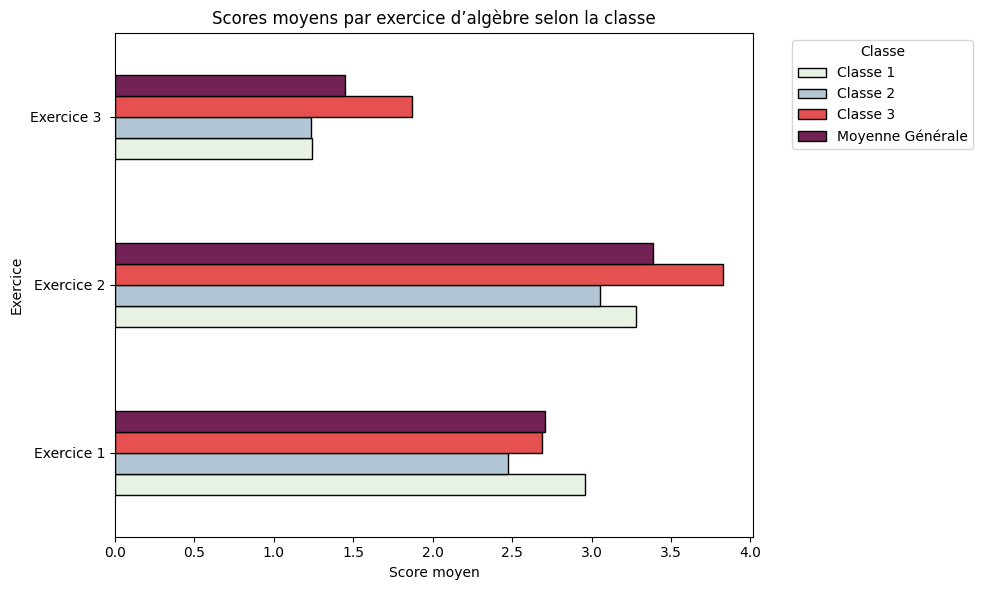

In [16]:
# Définir des couleurs personnalisées
couleurs = ['#E7F2E4', '#B2C6D5', '#E55050', '#732255']

# Créer un graphique à barres horizontales
ax = resume_algebre.set_index('Exercice').plot(
    kind='barh',
    figsize=(10, 6),
    color=couleurs,
    edgecolor='black'
)

# Styliser le graphique
plt.title('Scores moyens par exercice d’algèbre selon la classe')
plt.xlabel('Score moyen')
plt.ylabel('Exercice')
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [28]:
# Définir les colonnes d'algèbre et les seuils de maîtrise
colonnes_algebre = ['Exercice 1', 'Exercice 2', 'Exercice 3 ']  # Vérifier les espaces selon ton DataFrame
seuils = {'Exercice 1': 2.5, 'Exercice 2': 4.5, 'Exercice 3 ': 2.0}

# Fonction pour compter les élèves compétents
def compter_maitrise(df, nom_classe):
    comptes_maitrise = {}
    for exercice in colonnes_algebre:
        comptes_maitrise[exercice] = (df[exercice] >= seuils[exercice]).sum()
    return pd.DataFrame({
        'Exercice': list(comptes_maitrise.keys()),
        nom_classe: list(comptes_maitrise.values())
    })

# 2. Compter les élèves ayant atteint le niveau de maîtrise requis
maitrise_a = compter_maitrise(df_a, 'Classe 1')
maitrise_b = compter_maitrise(df_b, 'Classe 2')
maitrise_c = compter_maitrise(df_c, 'Classe 3')

# Fusionner les résultats
resume_maitrise = maitrise_a.merge(maitrise_b, on='Exercice').merge(maitrise_c, on='Exercice')

# Calculer le pourcentage global d'élèves compétents (toutes les classes)
nombre_total_eleves = len(df_a) + len(df_b) + len(df_c)
resume_maitrise['Total'] = resume_maitrise[['Classe 1', 'Classe 2', 'Classe 3']].sum(axis=1)
resume_maitrise['Pourcentage de Maîtrise'] = (resume_maitrise['Total'] / nombre_total_eleves * 100).round(1)

# Afficher le DataFrame
print("\nPourcentage des élèves compétents en algèbre:")
resume_maitrise



Pourcentage des élèves compétents en algèbre:


,Exercice,Classe 1,Classe 2,Classe 3,Total,Pourcentage de Maîtrise
0,Exercice 1,20,13,20,53,57.0
1,Exercice 2,7,4,10,21,22.6
2,Exercice 3,5,6,15,26,28.0


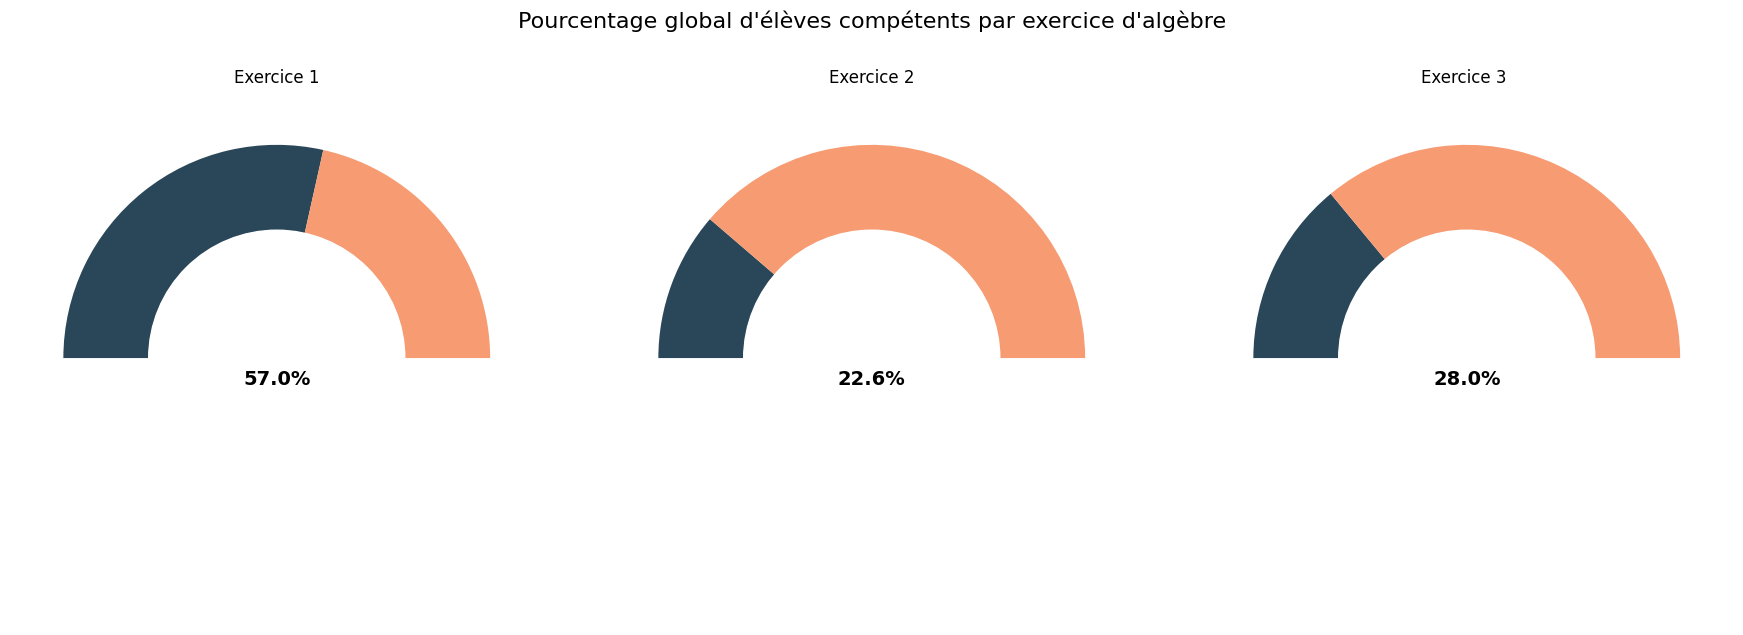

In [18]:
# Créer un graphique en anneau semi-circulaire par exercice
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=100)

# Définir les couleurs
couleurs_anneau = ['#2A4759', '#F79B72', 'white']  # Compétents, Non compétents, Partie cachée

# Boucle sur chaque exercice pour tracer le graphique
for i, ligne in resume_maitrise.iterrows():
    exercice = ligne['Exercice']
    pourcentage_maitrise = ligne['Pourcentage de Maîtrise']
    pourcentage_non_maitrise = 100 - pourcentage_maitrise

    # Données et étiquettes pour le diagramme en secteur
    valeurs = [pourcentage_maitrise, pourcentage_non_maitrise, 100]  # Le 100 occupe la moitié inférieure

    ax = axes[i]
    ax.pie(
        valeurs,
        colors=couleurs_anneau,
        startangle=180,
        counterclock=False,
        wedgeprops=dict(width=0.4)
    )

    # Ajouter un cercle blanc au centre pour l'effet donut
    cercle_centre = plt.Circle((0, 0), 0.6, color='white')
    ax.add_artist(cercle_centre)

    # Ajouter le pourcentage au centre du graphique
    ax.text(0, -0.1, f"{pourcentage_maitrise:.1f}%", ha='center', va='center', fontsize=14, fontweight='bold')

    ax.set_title(f"{exercice}", fontsize=12)

# Titre général
plt.suptitle("Pourcentage global d'élèves compétents par exercice d'algèbre", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


### 📝 Retour sur l’Analyse des Performances en Algèbre

Comme prévu, **« la classe 3 »** a obtenu les **meilleures moyennes** dans les exercices d’algèbre, tandis que la classe **« la classe 2 »** a enregistré les **performances les plus faibles** de manière constante.

#### 🔍 Analyse de la Maîtrise par Exercice

- **Exercice 1** *(Classification des Nombres)* :  
  Les élèves devaient classer les nombres en trois catégories : **entiers**, **décimaux** ou **fractions**.  
  ➤ *Plus de la moitié des élèves* ont démontré une maîtrise de cette compétence, ce qui suggère une compréhension relativement solide des types de nombres.

- **Exercice 2** *(Opérations sur Différents Types de Nombres)* :  
  Cet exercice évaluait leur capacité à effectuer des **opérations de base** (addition, soustraction, multiplication et division) sur différents types de nombres.  
  ➤ Les résultats montrent que près de **trois quarts des élèves ont rencontré des difficultés**, indiquant une lacune importante en termes de fluidité procédurale.

- **Exercice 3** *(Ranger les Nombres)* :  
  Les élèves devaient organiser divers nombres en **ordre croissant ou décroissant**.  
  ➤ À l’instar de l'exercice 2, environ **75 % des élèves n'ont pas atteint le niveau de maîtrise**, ce qui montre des difficultés à comparer et organiser des types de nombres mélangés.

#### 🧠 Conclusion

Il est **clairement nécessaire de renforcer la compréhension conceptuelle et procédurale** dans les exercices 2 et 3, en particulier dans la classe la plus en difficulté **( la classe 2 )**.  
Une approche différenciée axée sur la pratique et un accompagnement ciblé pourrait améliorer significativement les résultats des élèves dans ces domaines.

---


### 📊 Analyse des Résultats en Géométrie

Dans cette section, nous allons analyser les résultats en géométrie des trois classes.  
Notre analyse se concentrera sur deux objectifs principaux :

1. **Comparer les performances moyennes** de chaque classe dans les exercices de géométrie.
2. **Déterminer le pourcentage d’élèves ayant maîtrisé** chaque concept géométrique.

Cela nous aidera à identifier les notions bien comprises et celles qui nécessitent un renforcement supplémentaire.


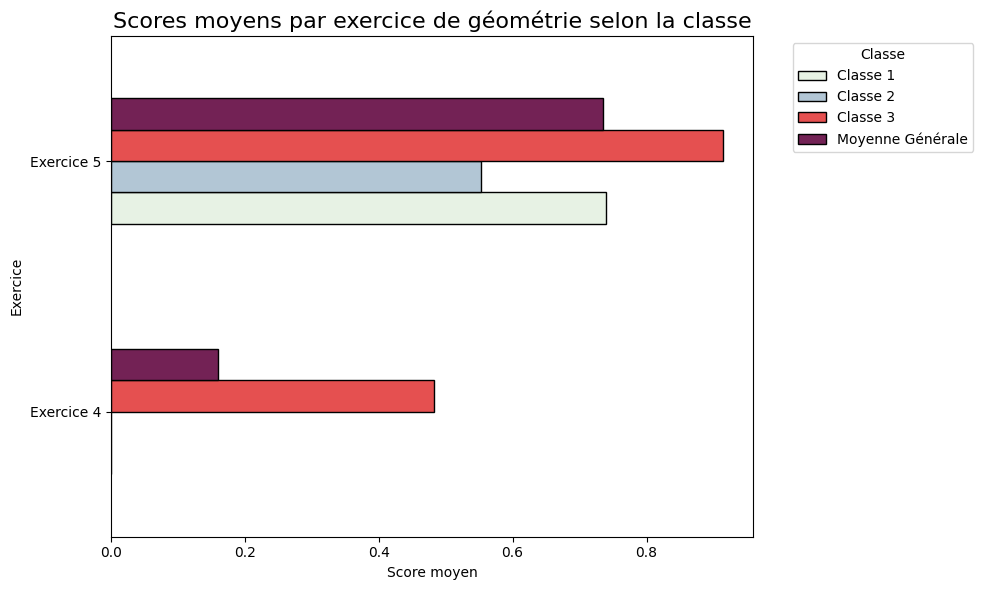

In [19]:
# Définir les colonnes des exercices de géométrie
colonnes_geometrie = ['Exercice 4', 'Exercice 5']

# Fonction pour obtenir la moyenne par classe pour les exercices de géométrie
def resume_geometrie_par_classe(df, nom_classe):
    moyennes = df[colonnes_geometrie].mean()
    return pd.DataFrame({'Exercice': moyennes.index, nom_classe: moyennes.values})

# 1. Calculer les moyennes pour chaque classe
resume_a_g = resume_geometrie_par_classe(df_a, 'Classe 1')
resume_b_g = resume_geometrie_par_classe(df_b, 'Classe 2')
resume_c_g = resume_geometrie_par_classe(df_c, 'Classe 3')

# Fusionner les résumés
resume_geometrie = resume_a_g.merge(resume_b_g, on='Exercice').merge(resume_c_g, on='Exercice')

# Ajouter la moyenne générale
resume_geometrie['Moyenne Générale'] = resume_geometrie[['Classe 1', 'Classe 2', 'Classe 3']].mean(axis=1)

# Définir les couleurs personnalisées
couleurs = ['#E7F2E4', '#B2C6D5', '#E55050', '#732255']

# Créer un graphique à barres horizontales
ax = resume_geometrie.set_index('Exercice').plot(
    kind='barh',
    figsize=(10, 6),
    color=couleurs,
    edgecolor='black'
)

# Styliser le graphique
plt.title('Scores moyens par exercice de géométrie selon la classe', fontsize=16)
plt.xlabel('Score moyen')
plt.ylabel('Exercice')
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [29]:
# Définir les colonnes de géométrie et les seuils de maîtrise
colonnes_geometrie = ['Exercice 4', 'Exercice 5']
seuils_geometrie = {
    'Exercice 4': 2,
    'Exercice 5': 2,
}

# Fonction pour compter les élèves compétents en géométrie
def compter_maitrise_geometrie(df, nom_classe):
    comptes_maitrise = {}
    for exercice in colonnes_geometrie:
        comptes_maitrise[exercice] = (df[exercice] >= seuils_geometrie[exercice]).sum()
    return pd.DataFrame({
        'Exercice': list(comptes_maitrise.keys()),
        nom_classe: list(comptes_maitrise.values())
    })

# 2. Compter par classe
maitrise_g_a = compter_maitrise_geometrie(df_a, 'Classe 1')
maitrise_g_b = compter_maitrise_geometrie(df_b, 'Classe 2')
maitrise_g_c = compter_maitrise_geometrie(df_c, 'Classe 3')

# Fusionner les résultats
resume_maitrise_geometrie = maitrise_g_a.merge(maitrise_g_b, on='Exercice').merge(maitrise_g_c, on='Exercice')

# Calculer le pourcentage global d'élèves compétents (toutes classes confondues)
nombre_total_eleves = len(df_a) + len(df_b) + len(df_c)
resume_maitrise_geometrie['Total'] = (
    resume_maitrise_geometrie[['Classe 2', 'Classe 2', 'Classe 3']].sum(axis=1)
)
resume_maitrise_geometrie['% Maîtrise'] = (
    resume_maitrise_geometrie['Total'] / nombre_total_eleves * 100
).round(1)

# Afficher le DataFrame
print("\nRésumé des résultats en Géométrie :")
resume_maitrise_geometrie



Résumé des résultats en Géométrie :


,Exercice,Classe 1,Classe 2,Classe 3,Total,% Maîtrise
0,Exercice 4,0,0,5,5,5.4
1,Exercice 5,5,1,7,9,9.7


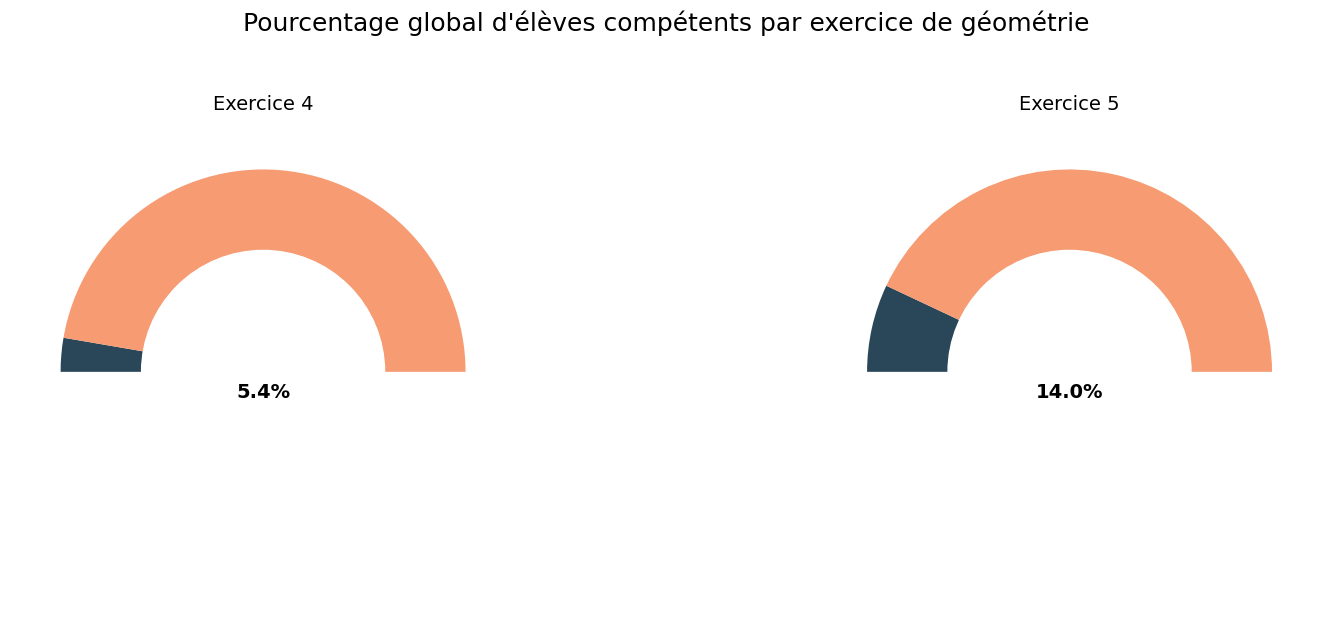

In [19]:
# Création des graphiques en demi-donut par exercice de géométrie
fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

# Couleurs : Compétent, Non compétent, Partie cachée (blanche)
couleurs_donut = ['#2A4759', '#F79B72', 'white']

# Boucle sur chaque exercice pour tracer le graphique
for i, row in resume_maitrise_geometrie.iterrows():
    exercice = row['Exercice']
    pourcentage_maitrise = row['% Maîtrise']
    pourcentage_non_maitrise = 100 - pourcentage_maitrise

    # Données pour le camembert (le 3e secteur masque la moitié inférieure)
    valeurs = [pourcentage_maitrise, pourcentage_non_maitrise, 100]

    ax = axes[i]
    ax.pie(
        valeurs,
        colors=couleurs_donut,
        startangle=180,
        counterclock=False,
        wedgeprops=dict(width=0.4)
    )

    # Cercle central blanc pour effet donut
    cercle_centre = plt.Circle((0, 0), 0.6, color='white')
    ax.add_artist(cercle_centre)

    # Texte du pourcentage au centre, légèrement vers le bas
    ax.text(0, -0.1, f"{pourcentage_maitrise:.1f}%", ha='center', va='center', fontsize=14, fontweight='bold')

    # Titre au-dessus de chaque donut
    ax.set_title(f"{exercice}", fontsize=14)

# Titre général
plt.suptitle("Pourcentage global d'élèves compétents par exercice de géométrie", fontsize=18, y=1.05)
plt.tight_layout()
plt.show()


### 📝 Retour sur l’Analyse en Géométrie

Comme le montre l’analyse, **la classe 3** a surpassé les autres classes dans tous les exercices de géométrie.  
Cependant, malgré cette réussite relative, **les performances globales dans les trois classes restent faibles**, ce qui indique des difficultés importantes avec les concepts géométriques.

- **Exercice 4** (Différencier un Segment d’une Demi-droite) :  
  Bien que certains élèves aient montré une compréhension de base, la performance globale est restée faible. Cela suggère que les élèves ont du mal à distinguer correctement les objets géométriques dans des contextes abstraits.

- **Exercice 5** (Calcul des Mesures de Figures Géométriques Régulières) :  
  Cet exercice s’est révélé le plus difficile pour toutes les classes, avec des notes **proches de zéro** dans certains cas.  
  Les élèves ont eu du mal à appliquer les formules pour calculer le **périmètre et l’aire** de figures simples comme les carrés et les triangles.

Ces constats soulignent un besoin clair de **révision ciblée et de renforcement conceptuel en géométrie**, notamment dans la compréhension des définitions géométriques et la résolution de problèmes de mesures.

---


### 🧮 Analyse de l’Exercice 6 : Problème de Proportionnalité et de Pourcentage

Le dernier exercice visait à évaluer la capacité des élèves à appliquer le **raisonnement proportionnel** et les **calculs de pourcentages** dans le cadre d’un problème de la vie courante.

Ce type de tâche mobilise à la fois le **raisonnement algébrique** et les **compétences en résolution de problèmes**, en demandant aux élèves de :
- Identifier les relations proportionnelles entre les quantités.
- Effectuer correctement les calculs de pourcentages.
- Comprendre le contexte et appliquer les opérations appropriées en conséquence.


In [21]:
# Colonne de l'exercice 6 et seuil de maîtrise
exercise_col = 'Exercice 6 '
mastery_threshold = 1  # Seuil de compétence

# Fonction pour compter les élèves compétents par classe
def count_mastery_ex6(df, class_name):
    competent_count = (df[exercise_col] >= mastery_threshold).sum()
    total_students = len(df)
    percent_competent = (competent_count / total_students) * 100 if total_students > 0 else 0
    return {
        'Classe': class_name,
        'Élèves compétents': competent_count,
        'Total élèves': total_students,
        '% Maîtrise': round(percent_competent, 1)
    }

# Calcul par classe
mastery_a = count_mastery_ex6(df_a, 'Classe 1')
mastery_b = count_mastery_ex6(df_b, 'Classe 2')
mastery_c = count_mastery_ex6(df_c, 'Classe 3')

# Résumé global
mastery_summary_ex6 = pd.DataFrame([mastery_a, mastery_b, mastery_c])

# Calcul du taux global pondéré
total_students_all = mastery_summary_ex6['Total élèves'].sum()
overall_mastery = (
    mastery_summary_ex6['Élèves compétents'].sum() / total_students_all * 100
    if total_students_all > 0 else 0
)

print(f"\nTaux global de maîtrise (toutes classes confondues) : {overall_mastery:.2f}%")
mastery_summary_ex6



Taux global de maîtrise (toutes classes confondues) : 12.90%


,Classe,Élèves compétents,Total élèves,% Maîtrise
0,Classe 1,6,31,19.4
1,Classe 2,1,31,3.2
2,Classe 3,5,31,16.1


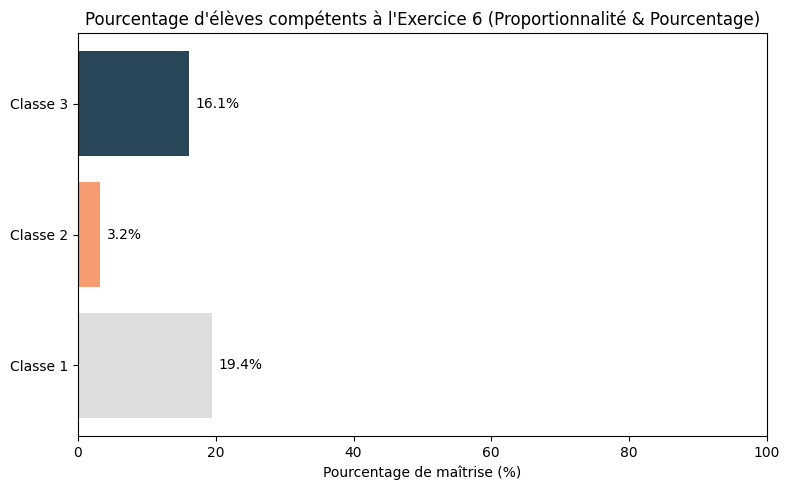

In [22]:
plt.figure(figsize=(8, 5))

# Attention à bien utiliser la bonne colonne 'Classe' 
bars = plt.barh(
    mastery_summary_ex6['Classe'], 
    mastery_summary_ex6['% Maîtrise'], 
    color=['#DDDDDD', '#F79B72', '#2A4759']
)

plt.xlabel('Pourcentage de maîtrise (%)')
plt.title('Pourcentage d\'élèves compétents à l\'Exercice 6 (Proportionnalité & Pourcentage)')
plt.xlim(0, 100)

# Ajouter les labels de pourcentage à droite des barres
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()


### 📝 Retour sur l’Exercice 6 : Problème de Proportionnalité et de Pourcentage

Les résultats de cet exercice révèlent que les élèves rencontrent généralement des difficultés avec les concepts de proportionnalité et de pourcentage.

- **La classe 1** obtient les meilleurs résultats, avec près de **20 %** des élèves ayant maîtrisé cette compétence.
- En revanche, **la classe 2** affiche une très faible maîtrise, avec seulement environ **3 %** des élèves ayant bien réussi cet exercice.
- De manière générale, les faibles pourcentages de maîtrise dans toutes les classes indiquent un besoin important d’un enseignement ciblé et de pratiques renforcées sur le raisonnement proportionnel et les calculs de pourcentages.
---


### 📌 Conclusion Générale et Recommandations

L’analyse des performances des élèves aux exercices d’algèbre et de géométrie révèle plusieurs éléments importants :

- **Algèbre :**  
  **La classe 3** surpasse régulièrement les deux autres classes, avec des scores moyens plus élevés et une proportion plus importante d’élèves maîtrisant les compétences clés en algèbre. Toutefois, des difficultés persistent dans toutes les classes, notamment dans les exercices 2 et 3, où beaucoup d’élèves peinent avec les opérations arithmétiques et le classement des nombres.

- **Géométrie :**  
  Les performances globales en géométrie sont nettement plus faibles dans l’ensemble des classes, même si **la classe 3** reste en tête avec des taux de maîtrise modestes. Les exercices portant sur les concepts géométriques et les mesures (comme la distinction entre un segment et une demi-droite, ou le calcul des périmètres et aires) révèlent des difficultés généralisées.

- **Exercice 6 (Résolution de Problèmes / Compétences Avancées) :**  
  Les pourcentages de maîtrise restent faibles, soulignant le besoin de renforcer les capacités de résolution de problèmes et l’application des concepts mathématiques dans des contextes plus complexes.

---

### ✅ Recommandations

1. **Remédiation ciblée :**  
   Organiser des séances de révision centrées sur les notions d’algèbre les plus problématiques, notamment les opérations arithmétiques et le classement des nombres.

2. **Renforcement en géométrie :**  
   Vu les faibles taux de maîtrise, il est essentiel de consolider les bases géométriques par des activités concrètes, des supports visuels et des exercices de résolution de problèmes.

3. **Différenciation pédagogique :**  
   Étant donné que la classe 3 obtient de meilleurs résultats, il est judicieux de partager les pratiques efficaces utilisées dans cette classe et d’adapter l’enseignement aux besoins des autres groupes.

4. **Évaluation continue :**  
   Mettre en place des évaluations formatives régulières afin de suivre les progrès des élèves et d’ajuster les méthodes pédagogiques en conséquence.

5. **Encourager la pratique :**  
   Fournir davantage de supports d’entraînement, en particulier pour les exercices les plus difficiles, afin de renforcer la confiance et les compétences des élèves.
